In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/facial-age-estimation/

import sys
sys.path.append('/content/drive/MyDrive/facial-age-estimation/src')


Mounted at /content/drive
/content/drive/MyDrive/facial-age-estimation


In [ ]:
ls

data/  README.txt  requirements.txt  src/  weights/


In [3]:
%cd /content/drive/MyDrive/facial-age-estimation/

/content/drive/MyDrive/facial-age-estimation


In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error
from evaluation.evaluate_multitrain import evaluate_multitrain
# 커스텀 모델 및 데이터셋 모듈
from models.age_regressor import AgeRegressor
from models.base_model import AgeEstimationModel
from models.r21d_mini import MiniR2Plus1D
from train.train_multitrain import AugmentedAgeDataset, SimpleImageDataset

In [ ]:

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import mean_absolute_error

from models.r21d_mini import MiniR2Plus1D
from models.vcop_head import VCOPN
from models.age_regressor import AgeRegressor
from models.base_model import AgeEstimationModel
from train.train_multitrain import train_multitrain

In [ ]:
from config import AgeRegConfigMulti
from config import TestEvalConfig
config_dict = TestEvalConfig()
config = AgeRegConfigMulti()

In [ ]:
X_train = torch.load(config.train_X_path)
y_train = torch.load(config.train_y_path)
X_val = torch.load(config.val_X_path)
y_val = torch.load(config.val_y_path)

In [ ]:
%cd /content/drive/MyDrive/facial-age-estimation/src/

/content/drive/.shortcut-targets-by-id/1bvtrfzyZHNtEdmd4PS68jmpGT2RO5sOZ/facial-age-estimation/src


In [ ]:
torch.cuda.empty_cache()

In [ ]:
config_dict.batch_size = 16
config.batch_size = 16

In [ ]:
model = train_multitrain(X_train, y_train, X_val, y_val,config, config_dict)

[Epoch 1] Loss: 80285.5924 | Val MAE: 11.4429
✅ Best model saved at epoch 1 (MAE=11.443)
[Epoch 2] Loss: 48797.6198 | Val MAE: 11.7734
[Epoch 3] Loss: 38318.8585 | Val MAE: 11.7190
[Epoch 4] Loss: 35085.5490 | Val MAE: 11.3016
✅ Best model saved at epoch 4 (MAE=11.302)
[Epoch 5] Loss: 32485.6761 | Val MAE: 15.0563
[Epoch 6] Loss: 29594.4049 | Val MAE: 12.8449
[Epoch 7] Loss: 27633.6678 | Val MAE: 12.6403
[Epoch 8] Loss: 25947.0544 | Val MAE: 13.5087
[Epoch 9] Loss: 24147.0872 | Val MAE: 14.3957
🛑 Early stopping triggered.


[Age Regression Evaluation]
MAE: 10.72
MSE: 198.00
RMSE: 14.07


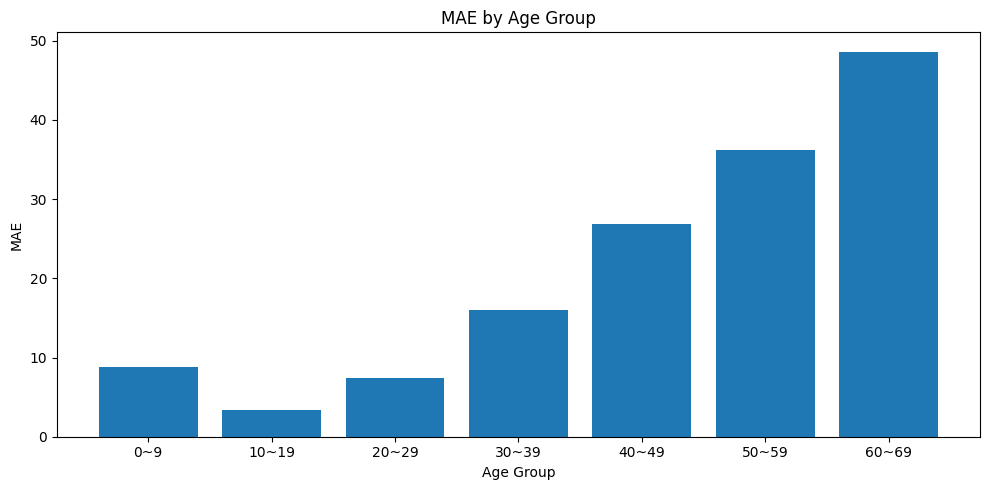

10.724222183227539

In [5]:
from config import AgeRegConfigMulti, TestEvalConfig
import torch

# 1. 설정 클래스 인스턴스 생성
config = AgeRegConfigMulti()
config_dict = TestEvalConfig()

config_dict.save_dir = './src/weights/multi_checkpoint'
config_dict.save_name = 'multitrain'

# 2. 검증 데이터 불러오기
X_test = torch.load(config.test_X_path)
y_test = torch.load(config.test_y_path)

# 3. 평가 실행
evaluate_multitrain(X_test, y_test, config, config_dict)